## Unsupervised Capstone Project

### Ten articles with 10 different authors have been selected for this project. The articles are obtained from free Gutenberg Project and they are all Christmas-related.

In [1]:
import timeit
start=timeit.default_timer()

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

from collections import Counter

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import spacy
nlp = spacy.load('en')
from spacy.lang.en.stop_words import STOP_WORDS

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [6]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

## Load files

In [8]:
filename=['brady.txt','butler.txt','cutting.txt','dawson.txt','dyke.txt',
          'hughes.txt','mitchell.txt','richmond.txt','rinehart.txt','stretton.txt']
#filename=['brady.txt','butler.txt']

In [9]:
def load_text(filename):
    file=open(filename,'r')
    text=file.read()
    file.close
    return text

In [10]:
def clean_text(text):
    text=text.lower()
    text=text.replace("ï»¿","")
    text=text.replace("\n"," ")
    text=text.replace("*"," ")
    text=text.replace("-"," ")
    text=text.replace("\'s"," is")
    text=text.replace("n\'t"," not")
    text=text.replace("\'m"," am")
    text=text.replace("\'ll"," will")
    text=text.replace("in'","ing")
    text=text.replace("mr.","mr")
    text=text.replace("mrs.","mrs")
    text=text.replace("i'd","i would")
    text=text.replace("p. s.","")
    text=text.replace("n. y.","")
    text=text.replace("dec.","dec")
    text=text.replace("1904.","1904")
    text=text.replace("austin.","austin")
    text=text.replace("co.","co")
    text=text.replace("new york.","new york")
    text=text.replace("kringle.","kringle")
    text=text.replace("dear.","dear ")
    text=text.replace("not.","not ")
    text=text.replace("do.","do ")
    text=text.replace("nan.","nan ")
    text=text.replace("yes.","yes ")
    text=text.replace("song.","song ")
    text=text.replace("boy.","boy ")
    text=text.replace("will.","will ")
    text=text.replace("now.","now ")
    text=text.replace("child.","child ")
    text=text.replace("reconciled.","reconciled ")
    
    text=text.replace('"'," ")
    text=text.replace('_'," ")
    text=text.replace('?'," ")
    text=text.replace('!'," ")
    text=text.replace(','," ")
    text=text.replace(":"," ")
    text=text.replace(";"," ")
    text=text.replace("...","")
       
    text=re.sub("[\(\[].*?[\)\]]"," ",text)
 
    return text

## K-Means Clustering

In [11]:
vectorizer = TfidfVectorizer(stop_words='english',max_features=500)
df = pd.DataFrame()
for i in range(len(filename)):
    text=load_text(filename[i])
    text=clean_text(text)
    text_clean=text.split()
    
    X = vectorizer.fit_transform(text_clean)
    X_np=X.todense()
    X_df=pd.DataFrame(X_np)
    
    #author=filename[i].replace('.txt','')
    #X_df['author']=author   
    X_df['author']=i
    
    df=df.append(X_df)

In [12]:
df.shape

(72036, 501)

In [13]:
x=df.drop(['author'],axis=1)
y=df['author']

In [14]:
model = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=2)

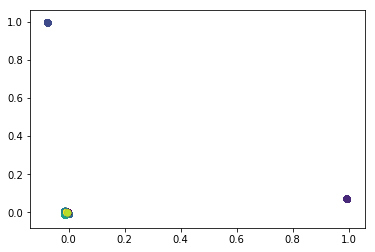

In [15]:
x_norm=normalize(x)
x_pca=PCA(2).fit_transform(x_norm)
y_pred=model.fit_predict(x_pca)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred)
plt.show()

In [16]:
y_pred=model.fit_predict(x_norm)
pd.crosstab(y_pred,y)

author,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,2,3,2,8,2,6,4,3,9,2
1,10,4,19,8,2,4,3,2,4,4
2,8843,4627,5277,10217,7378,5510,5681,5902,8174,9731
3,2,1,1,4,3,1,1,1,41,2
4,5,2,4,4,21,3,17,2,6,11
5,2,2,8,9,2,7,1,8,6,4
6,9,29,2,34,6,3,3,2,2,4
7,14,1,2,3,34,2,2,3,12,4
8,10,1,2,5,2,2,9,42,12,89


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)

In [18]:

model = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1)
model.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
y_pred=model.predict(x_test)

In [20]:
from sklearn import metrics
    
metrics.adjusted_rand_score(y_test, y_pred)

-1.1753793882447939e-05

In [21]:
y_pred=model.predict(x_train)
metrics.adjusted_rand_score(y_train, y_pred)

-0.00013617983389798633

In [22]:
from sklearn.metrics import pairwise_distances

model.fit(x)
labels=model.labels_

score=metrics.silhouette_score(x, labels, metric='euclidean')
print(score)

0.5653618131007853


## Unsupervised Feature Generation

In [23]:
text_list=[]
len_list=[None]*(len(filename)+1)
len_list[0]=0
for i in range(0,len(filename)):
    text=load_text(filename[i])
    text=clean_text(text)
    temp_list=text.split(".")
    len_list[i+1]=len_list[i]+len(temp_list)
    text_list=text_list+temp_list

In [24]:
len(text_list)

4181

In [25]:
len_list

[0, 714, 1013, 1230, 1923, 2268, 2565, 2920, 3236, 3806, 4181]

In [26]:
df=pd.DataFrame(index=range(len(text_list)),columns=['author'])
for i in range(0,(len(len_list)-1)):
    author=filename[i].replace('.txt','')
    x=len_list[i]
    y=len_list[i+1]
    df['author'][x:y]=author

In [27]:
len(text_list)

4181

In [28]:
df.shape

(4181, 1)

In [29]:
len_list

[0, 714, 1013, 1230, 1923, 2268, 2565, 2920, 3236, 3806, 4181]

In [30]:
len(text_list)

4181

In [31]:
text_list

['i  the baby   a little child shall lead them      i  the baby   the heavy perfume of rare blossoms  the wild strains of mad music  the patter of flying feet  the murmur of speech  the ring of laughter  filled the great hall',
 ' now and again a pair of dancers  peculiarly graceful and particularly daring  held the center of the floor for a moment while the room rang with applause',
 '  into alcoves  screened and flower decked  couples wandered',
 ' in the dancing space hands were clasped  bosoms rose and fell  hearts throbbed  pulses beat  and moving bodies kept time to rhythmic sound',
 '  suddenly the music stopped  the conversation ceased  the laughter died away',
 ' almost  as it were  poised in the air  the dancers stood amazed',
 ' one looked to another in surprise',
 ' something stole throughout the room which was neither music  nor lights  nor fragrance  but which was life  a presence    do you see that child   asked the wildest of the dancers of her escort',
 '  there   she 

## Bag of Words

In [32]:
vectorizer=CountVectorizer(stop_words="english", 
                           analyzer='word', 
                           ngram_range=(1, 4), 
                           max_df=1.0, 
                           min_df=1, 
                           max_features=6000)

In [33]:
x = vectorizer.fit_transform(text_list)
x = x.toarray()
x.shape

(4181, 6000)

In [34]:
y=df['author']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.25,
                                                    )

In [36]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(x_train, y_train)
print('Training set score:', rfc.score(x_train, y_train))
print('\nTest set score:', rfc.score(x_test, y_test))

Training set score: 0.9735247208931419

Test set score: 0.5105162523900574


In [37]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('Training set score:', lr.score(x_train, y_train))
print('\nTest set score:', lr.score(x_test, y_test))

Training set score: 0.9333333333333333

Test set score: 0.6137667304015296


## TFIDF

In [38]:
vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

In [39]:
x = vectorizer.fit_transform(text_list)
x = x.toarray()
x.shape

(4181, 3262)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.25,
                                                    )

In [41]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(x_train, y_train)
print('Training set score:', rfc.score(x_train, y_train))
print('\nTest set score:', rfc.score(x_test, y_test))

Training set score: 0.9735247208931419

Test set score: 0.5334608030592735


In [42]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('Training set score:', lr.score(x_train, y_train))
print('\nTest set score:', lr.score(x_test, y_test))

Training set score: 0.8143540669856459

Test set score: 0.5774378585086042
